1.  Importing Visualizations Libraries and Data

In [19]:
# Importing the necessary libraries for analysis and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [20]:
# Ensuring i have the latest version of matplotplib installed
matplotlib.__version__

'3.8.0'

In [21]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [22]:
# Import the “world_university_ranking.csv” file
df_ranking = pd.read_csv(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\Rankings_data_cleaned.csv', index_col = False)

In [ ]:
# Checking the output of the cleaned data frame

In [5]:
df_ranking.shape

(2199, 14)

In [6]:
df_ranking.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           1.0        5  100.00  2012  
1            12          4          4           2.0        1   91.67  2012  
2             4          2          2           4.0       15   89.50  2012  
3            16         16         11          13.0       50   86.17  2012  
4            37         22         22          24.5       18   85.21  2012

In [23]:
# Removing the unnamed variable
df_ranking.drop(df_ranking.columns[df_ranking.columns.str.contains('Unnamed',case=False)], axis = 1, inplace = True)

In [24]:
# Rechecking the output to ensure the unnamed column has been removed
df_ranking.shape

(2199, 14)

In [25]:
# Checking the columns we have
df_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [26]:
# Checking the data types
df_ranking.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [27]:
# Rechecking the data frame
df_ranking.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           1.0        5  100.00  2012  
1            12          4          4           2.0        1   91.67  2012  
2             4          2          2           4.0       15   89.50  2012  
3            16         16         11          13.0       50   86.17  2012  
4            37         22         22          24.5       18   85.21  2012

In [ ]:
2. Creating a subset of variables suitable for the exploratory visual analysis exluding the year columns

In [29]:
df_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [30]:
# Creating a subset excluding the "year", "institition" and "country" column

sub = df_ranking[['world_rank', 'national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents','score']]

In [31]:
sub

world_rank  national_rank  quality_of_education  alumni_employment  \
0              1              1                     7                  9   
1              2              2                     9                 17   
2              3              3                    17                 11   
3              4              1                    10                 24   
4              5              4                     2                 29   
...          ...            ...                   ...                ...   
2194         996              7                   367                567   
2195         997              4                   236                566   
2196         998             18                   367                549   
2197         999             40                   367                567   
2198        1000             83                   367                567   

      quality_of_faculty  publications  influence  citations  broad_impact  \
0                      1             1          1          1           1.0   
1                      3            12          4          4           2.0   
2                      5             4          2          2           4.0   
3                      4            16         16         11          13.0   
4                      7            37         22         22          24.5   
...                  ...           ...        ...        ...           ...   
2194                 218           926        845        812         969.0   
2195                 218           997        908        645         981.0   
2196                 218           830        823        812         975.0   
2197                 218           886        974        812         975.0   
2198                 218           861        991        812         981.0   

      patents   score  
0           5  100.00  
1           1   91.67  
2          15   89.50  
3          50   86.17  
4          18   85.21  
...       ...     ...  
2194      816   44.03  
2195      871   44.03  
2196      824   44.03  
2197      651   44.02  
2198      547   44.02  

[2199 rows x 11 columns]

In [ ]:
3. Creating a correlation matrix heatmap (colored)

In [32]:
# Create a correlation matrix using pandas with the subset
sub.corr()

world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238813              0.675921   
national_rank           0.238813       1.000000              0.212505   
quality_of_education    0.675921       0.212505              1.000000   
alumni_employment       0.668259       0.135719              0.605738   
quality_of_faculty      0.663641       0.223092              0.786074   
publications            0.922988       0.327143              0.624353   
influence               0.895804       0.161316              0.645364   
citations               0.856481       0.187035              0.630159   
broad_impact            0.949689       0.210361              0.615823   
patents                 0.698014       0.159675              0.527667   
score                  -0.549584      -0.199698             -0.601667   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668259            0.663641      0.922988   
national_rank                  0.135719            0.223092      0.327143   
quality_of_education           0.605738            0.786074      0.624353   
alumni_employment              1.000000            0.558219      0.571729   
quality_of_faculty             0.558219            1.000000      0.634184   
publications                   0.571729            0.634184      1.000000   
influence                      0.526967            0.656181      0.874872   
citations                      0.558820            0.651959      0.829804   
broad_impact                   0.530608            0.637804      0.929408   
patents                        0.527788            0.554809      0.671344   
score                         -0.511213           -0.694092     -0.522578   

                      influence  citations  broad_impact   patents     score  
world_rank             0.895804   0.856481      0.949689  0.698014 -0.549584  
national_rank          0.161316   0.187035      0.210361  0.159675 -0.199698  
quality_of_education   0.645364   0.630159      0.615823  0.527667 -0.601667  
alumni_employment      0.526967   0.558820      0.530608  0.527788 -0.511213  
quality_of_faculty     0.656181   0.651959      0.637804  0.554809 -0.694092  
publications           0.874872   0.829804      0.929408  0.671344 -0.522578  
influence              1.000000   0.845108      0.928080  0.611558 -0.523305  
citations              0.845108   1.000000      0.876017  0.598466 -0.522905  
broad_impact           0.928080   0.876017      1.000000  0.636191 -0.529059  
patents                0.611558   0.598466      0.636191  1.000000 -0.475274  
score                 -0.523305  -0.522905     -0.529059 -0.475274  1.000000

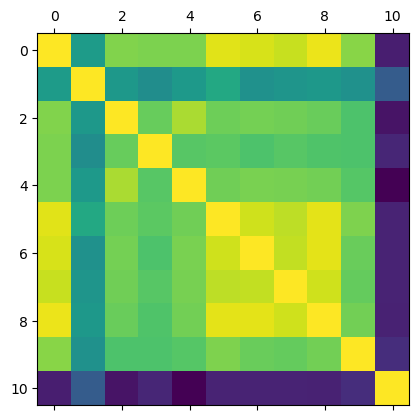

In [33]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

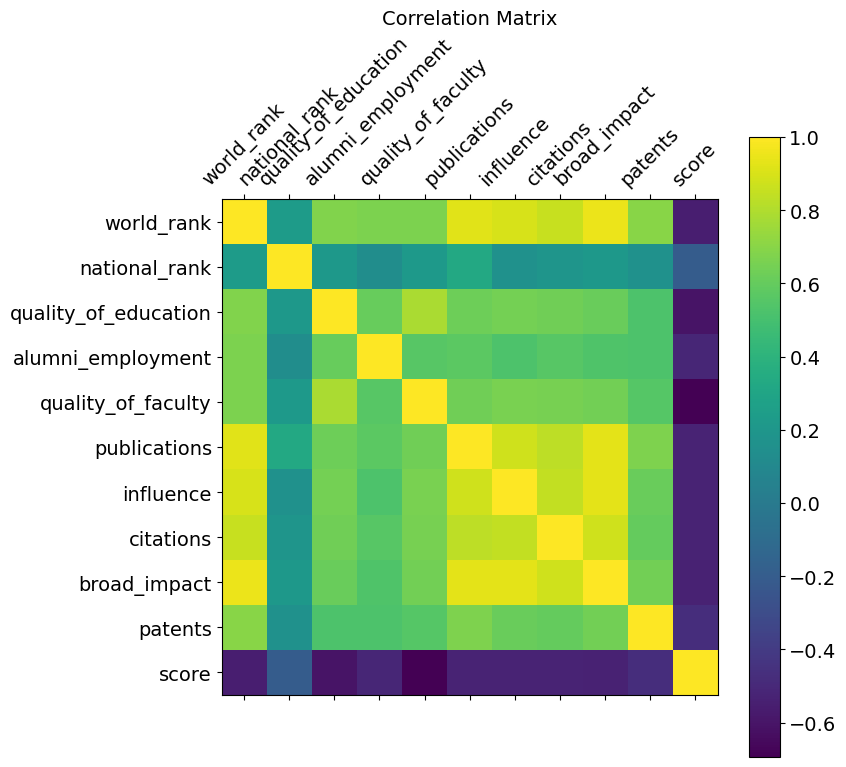

In [34]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Creating a correlation heatmap using seaborn:

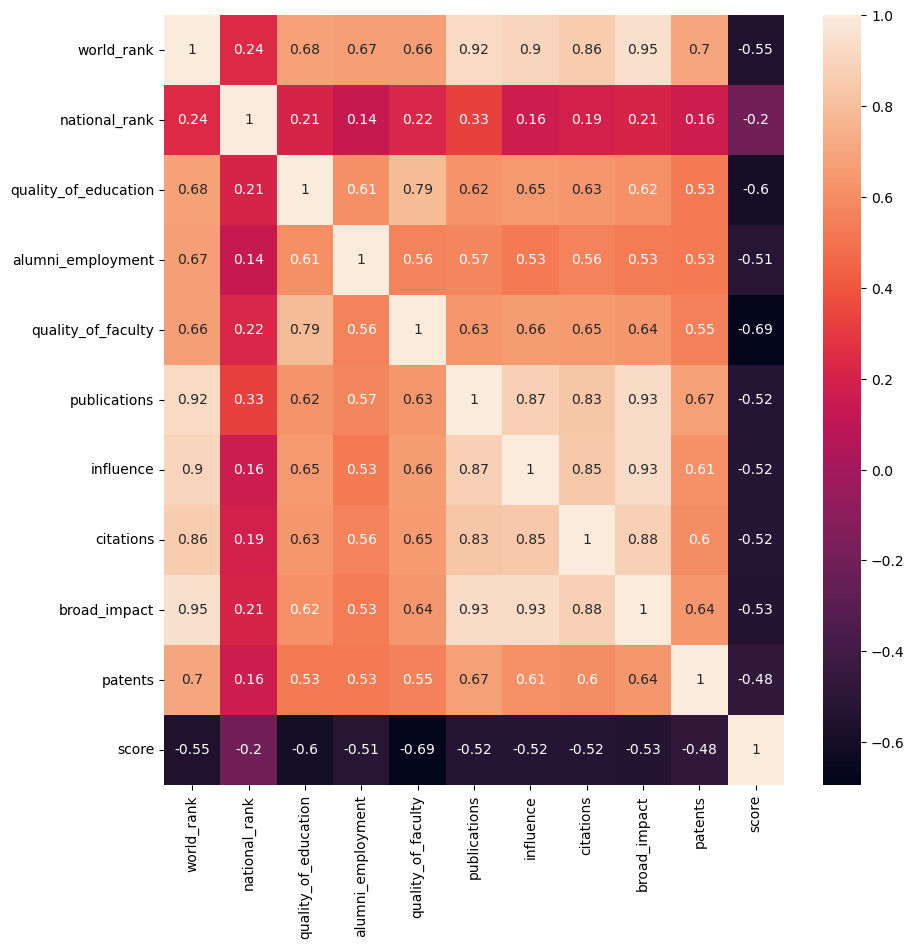

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Save the plot to the specified path
plt.savefig(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\correlation_heatmap.png')

# Show the plot (optional)
plt.show()

# The correlation heatmap showed a strong positive correlation between world rank and several academic metrics, with correlation coefficients of 0.92 for publications, 0.9 for influence, 0.95 for broad impact, and 0.86 for citations. This suggests that universities with higher numbers of publications, greater influence, broader impact, and more citations tend to have better (lower) world rankings, highlighting the significance of research output and academic influence in determining a university's rank. The world rank is the dependent or target variable in this analysis because it is the outcome we aim to predict or explain, while the other variables—publications, influence, broad impact, and citations—are the independent variables, as they are the factors believed to influence or determine the university's world rank. The strong positive correlations indicate that these independent variables significantly affect the world rank, with higher values in these metrics leading to better rankings.

In [ ]:
4. Creating scatter plots for the strongest correlations                         

In [ ]:
# Lets look at the correlation between world rank and publications

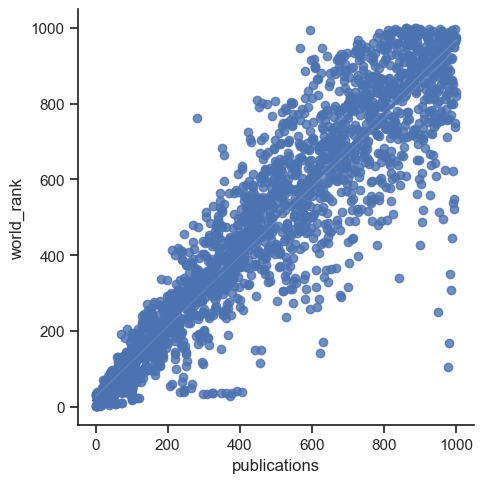

In [103]:
# Create a scatterplot for the "publications" and "world rank" columns in seaborn
sns.lmplot(x = 'publications', y = 'world_rank', data = sub)

# This scatter plot shows the relationship between the number of publications and the world rank of universities. Each point represents a university, with the x-axis indicating the number of publications and the y-axis showing the world rank. The plot reveals a clear trend where universities with a higher number of publications tend to have a higher world rank. This positive correlation suggests that the number of publications, is a significant factor influencing a university's world rank, consistent with the strong correlation coefficient of 0.92 observed earlier.

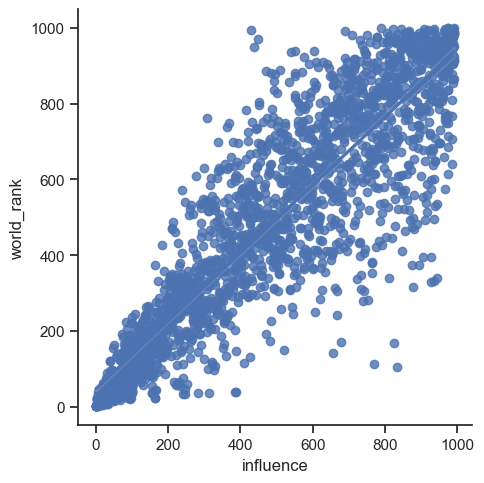

In [104]:
# Create a scatterplot for the "publications" and "world rank" columns in seaborn
sns.lmplot(x = 'influence', y = 'world_rank', data = sub)

# This scatter plot displays the relationship between the influence metric and the universities world rank. Each point represents a university, with the x-axis representing the influence score and the y-axis representing the world rank. The plot shows a strong positive correlation between influence and world rank, meaning that universities with higher influence scores tend to have better world rankings. This trend supports the correlation coefficient of 0.9, indicating that the influence of a university's research significantly impacts its world ranking.

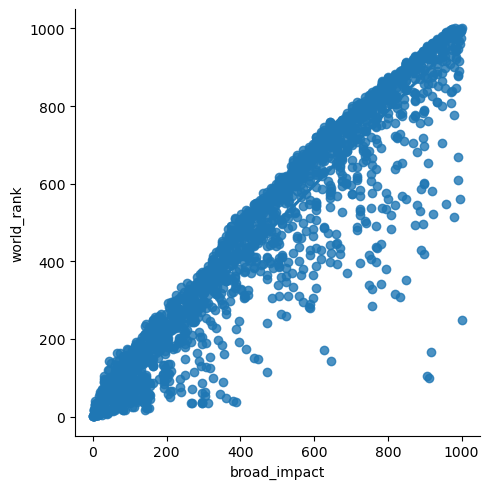

In [41]:
# Create a scatterplot for the "publications" and "world rank" columns in seaborn
sns.lmplot(x = 'broad_impact', y = 'world_rank', data = sub)

# This scatter plot illustrates the relationship between broad impact and world rank for universities. Each dot represents a university, with the x-axis showing the broad impact score and the y-axis representing the world rank. The plot reveals a strong positive correlation, indicating that universities with higher broad impact scores tend to achieve higher world rankings. This pattern aligns with the correlation coefficient of 0.95, suggesting that broad impact is a significant factor in determining a university's world rank.

5.  Creating a pair plot of the entire data set

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

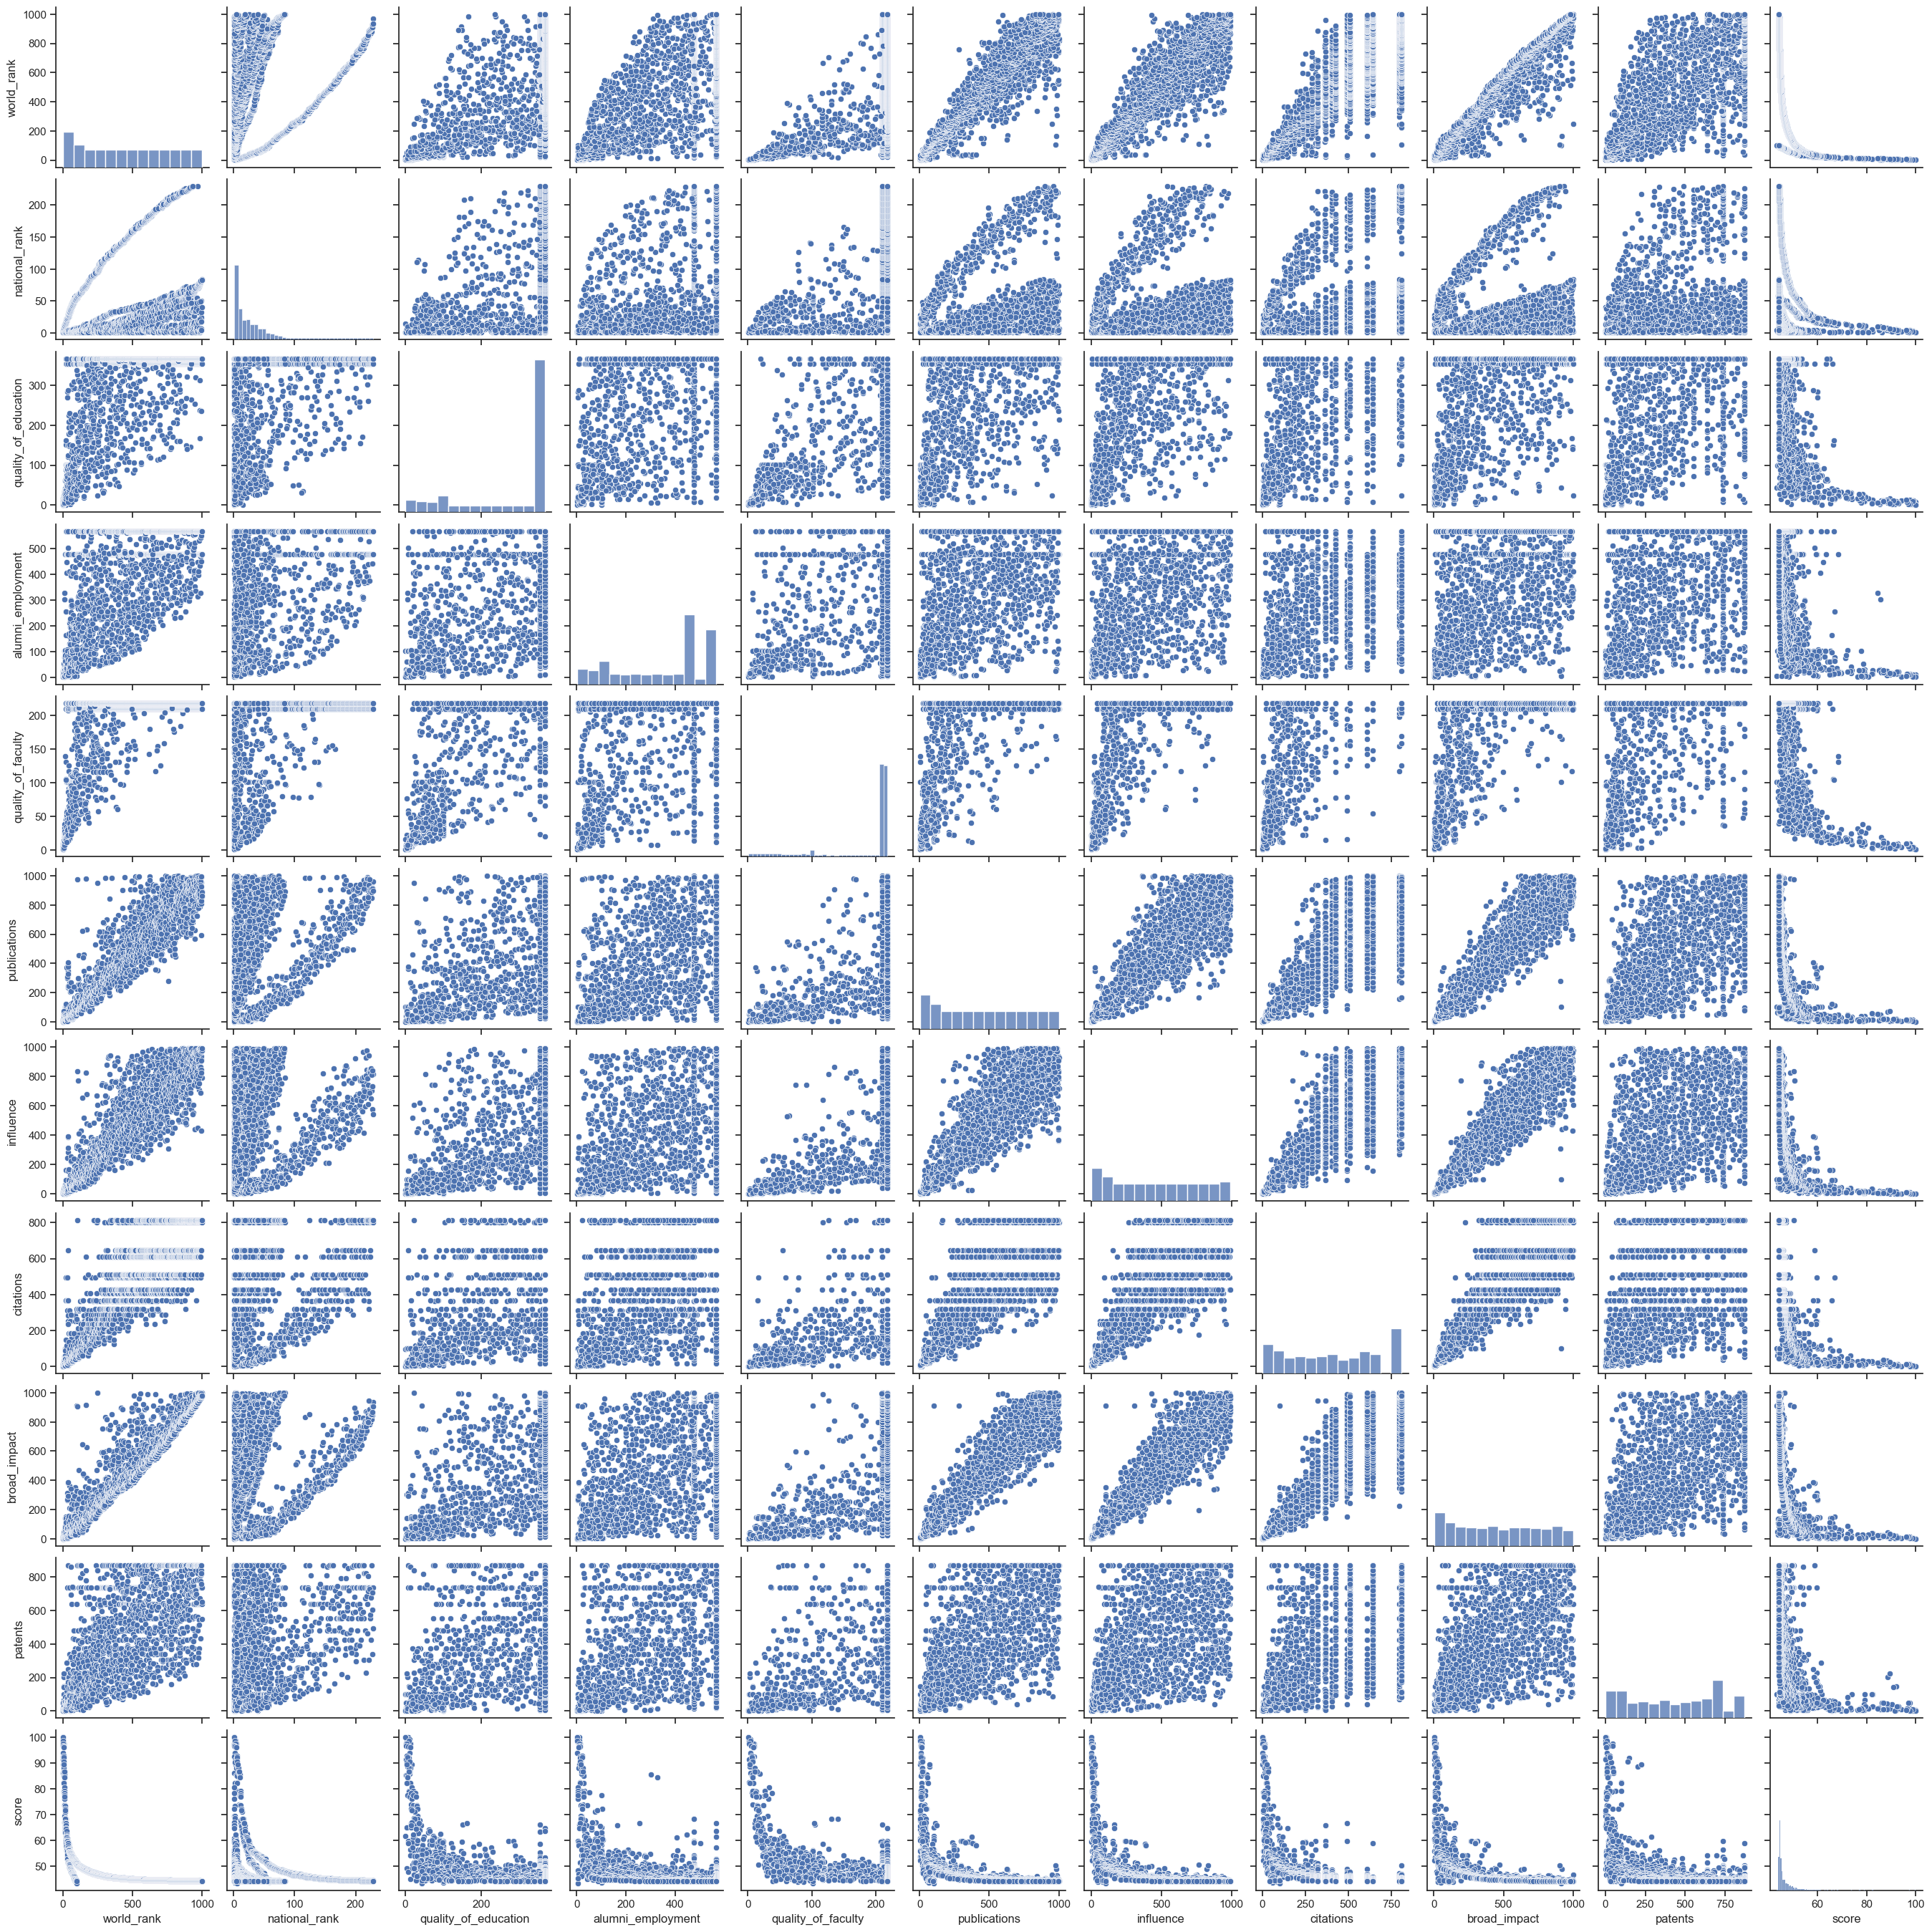

In [105]:
g = sns.pairplot(sub)

# The pair plot shows a lot of information, For example, let’s take a look at the top row for each variable crossed with “world rank.” The scatterplots shows that there’s a closer relationship between “world rank and almost all the variables on the first row. Furthermore, this would help me pick reliable predictors for further analysis. I would like to explore further the citations variable because of the clusters and gaps in the data.

6. Categorical Plots

In [ ]:
# Creating a categorical variable that splits the "world rank" column into categories

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='world_rank', ylabel='Count'>

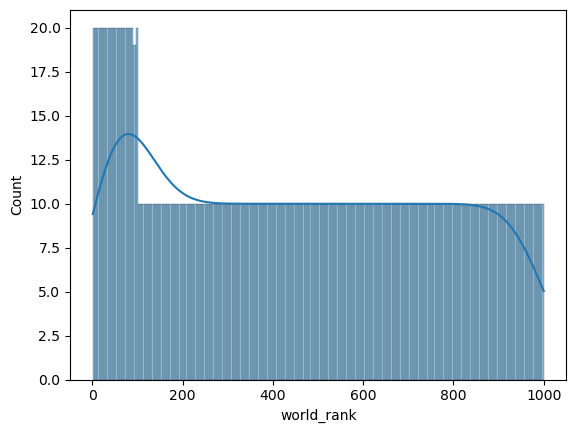

In [50]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the world ranking. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['world_rank'], bins = 200, kde = True)

In [51]:
sub.loc[sub['world_rank'] < 100, 'world rank category'] = 'Top tier'

C:\Users\49157\AppData\Local\Temp\ipykernel_26868\4054250441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['world_rank'] < 100, 'world rank category'] = 'Top tier'


In [52]:
sub.loc[(sub['world_rank'] >= 100) & (sub['world_rank'] < 500), 'world rank category'] = 'Middle tier'

In [53]:
sub.loc[sub['world_rank'] >= 500, 'world rank category'] = 'Lower tier'

In [54]:
sub['world rank category'].value_counts(dropna = False)

world rank category
Lower tier     1002
Middle tier     802
Top tier        395
Name: count, dtype: int64

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


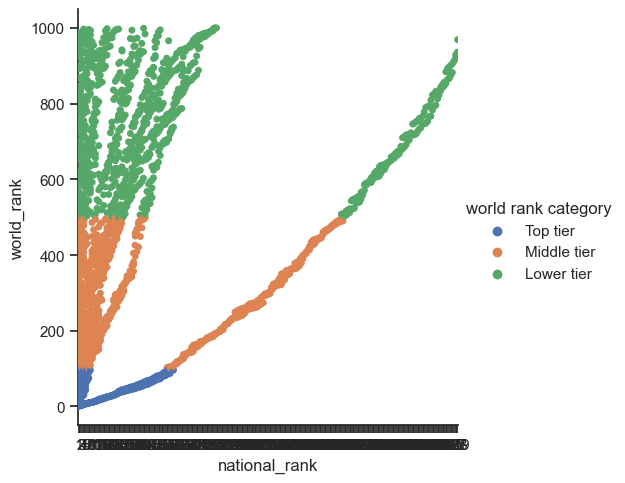

In [56]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="national_rank", y="world_rank", hue="world rank category", data=sub)

# The plot likely shows how universities in each category are distributed across different national and global ranks. For instance, you might see that Top tier universities, which have high world rankings, often have lower national ranks which might suggest that the universities are also top in their own countries. On the other hand, Lower tier universities appear more dispersed across both national and global ranks. This visualization helps us understand whether high global rankings correspond with high national rankings and if there are distinct patterns for universities in each tier.

In [ ]:
7a. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far.

# My first question was "What are the criterias used to determine the universities world rank?" and we can see from our visualizations that publications, influence and broad impact were the biggest and highest criterias used to determine the universities world rank.

# Are there universities that consistently rank at the top or bottom? Based on the analysis, the top 100 universities are ranked as the top tier meaning that these universities are recognized for their academic excellence, research output, and overall impact.g?

In [ ]:
7b. Add any new questions that may have arisen based on the early findings in your visual exploration.

# How do the global rankings of Top tier universities compare with their national rankings? Are they significantly better in their own countries as well? Top tier universities have national ranks as well, indicating their global excellence is matched by their national standing. However, there can be exceptions based on some factors. 

# For universities in the Lower tier, is there a large variation in national_rank or are they mostly ranked similarly within their countries? Universities in the Lower tier shows a wide range of national_rank values, which could suggest varying levels of national recognition despite their lower global rank.

# What trends can be observed from the relationship between national_rank and world_rank? Does a higher global rank generally correlate with a higher national rank?  A higher global rank (Top tier) is associated with a higher national rank, suggesting that universities with global reputations also perform well nationally. On the other hand, this correlation might not be perfect, most especially in countries with less global prominent institutions.

In [ ]:
8. Define any hypotheses that you can at this point. You’ll be testing these later on.

# Based on the correlation heatmap i showed, here are some hypotheses i might consider testing:

Hypothesis 1: Higher Number of Publications Leads to lower World Ranking. 

Null Hypothesis (H₀): There is no significant relationship between the number of publications and a university's world rank.
Alternative Hypothesis (H₁): A higher number of publications is positively associated with a lower world ranking for universities.

Hypothesis 2: Greater Influence Contributes to Better and lower World Ranking

Null Hypothesis (H₀): There is no significant relationship between a university's influence and its world ranking.
Alternative Hypothesis (H₁): Greater influence is positively associated with a better and lower world ranking for universities.

Hypothesis 3: Broader Impact Improves World Ranking

Null Hypothesis (H₀): There is no significant relationship between the breadth of impact and a university's world ranking.
Alternative Hypothesis (H₁): A broader impact is positively associated with a better world ranking for universities.

Hypothesis 4: More Citations Enhance World Ranking

Null Hypothesis (H₀): There is no significant relationship between the number of citations and a university's world ranking.
Alternative Hypothesis (H₁): A higher number of citations is positively associated with a better world ranking for universities.

Hypothesis 5: Higher world Rank Correlates with Higher national Rank

Null Hypothesis (H₀): There is no significant correlation between a university’s world rank and its national rank.
Alternative Hypothesis (H₁): There is a significant positive correlation between a university’s world rank and its national rank.

These hypotheses are based on the observed strong positive correlations between world rank and the academic metrics provided. 


In [ ]:
# Exporting the clean data set

In [57]:
# Creating a path
path = r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs'
path

'C:\\Users\\49157\\Downloads\\Data analysis course\\Advanced analytics and dashboard designs'

In [61]:
df_ranking.to_csv(os.path.join(path, 'World University Rankings', 'Rankings_data_cleaned.csv'))